In [1]:
import numpy as np
import pandas as pd

In [23]:
data = pd.read_csv('the_last_of_us_survival_dataset.csv')

df = pd.DataFrame(data)
df.head()

,Edad,Genero,Faccion,ExperienciaCombate,HabilidadSigilo,Salud,ArmaFuego,ArmaCuerpoCuerpo,ItemCreable,NivelInfeccionZona,CondicionesClimaticas,NivelEstrés,TieneCompañero,Superviviente
0,58,Masculino,Militar,9,3,74,Bow,Lead Pipe,Health Kit,4,Seco,5,0,1
1,16,Femenino,Civil,9,2,82,El Diablo,Ninguna,Molotov Cocktail,10,Lluvioso,8,0,0
2,33,Femenino,Civil,4,5,66,Shorty,Ninguna,Health Kit,4,Lluvioso,10,0,0
3,33,Femenino,Civil,3,6,98,Shotgun,Lead Pipe,Health Kit,8,Seco,1,1,0
4,57,Masculino,Militar,2,5,52,Revolver,Hatchet,Shiv,10,Seco,0,0,0


In [24]:
# Renaming Spanish cols to English

mapping = {
    "Edad": "Age",
    "Genero": "Gender",
    "Faccion": "Faction",
    "ExperienciaCombate": "CombatExp",
    "HabilidadSigilo":"StealthSkill",
    "Salud":"Health",
    "ArmaFuego":"Firearm",
    "ArmaCuerpoCuerpo":"MeleeWeapon",
    "ItemCreable":"CraftableItem",
    "NivelInfeccionZona":"ZoneInfectionLevel",
    "CondicionesClimaticas":"WeatherConditions",
    "NivelEstrés":"StressLevel",
    "TieneCompañero":"HasCompanion",
    "Superviviente":"Survived"
    # add more...
}

df = df.rename(columns=mapping)
df.head()

,Age,Gender,Faction,CombatExp,StealthSkill,Health,Firearm,MeleeWeapon,CraftableItem,ZoneInfectionLevel,WeatherConditions,StressLevel,HasCompanion,Survived
0,58,Masculino,Militar,9,3,74,Bow,Lead Pipe,Health Kit,4,Seco,5,0,1
1,16,Femenino,Civil,9,2,82,El Diablo,Ninguna,Molotov Cocktail,10,Lluvioso,8,0,0
2,33,Femenino,Civil,4,5,66,Shorty,Ninguna,Health Kit,4,Lluvioso,10,0,0
3,33,Femenino,Civil,3,6,98,Shotgun,Lead Pipe,Health Kit,8,Seco,1,1,0
4,57,Masculino,Militar,2,5,52,Revolver,Hatchet,Shiv,10,Seco,0,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 250 non-null    int64 
 1   Gender              250 non-null    object
 2   Faction             250 non-null    object
 3   CombatExp           250 non-null    int64 
 4   StealthSkill        250 non-null    int64 
 5   Health              250 non-null    int64 
 6   Firearm             250 non-null    object
 7   MeleeWeapon         250 non-null    object
 8   CraftableItem       250 non-null    object
 9   ZoneInfectionLevel  250 non-null    int64 
 10  WeatherConditions   250 non-null    object
 11  StressLevel         250 non-null    int64 
 12  HasCompanion        250 non-null    int64 
 13  Survived            250 non-null    int64 
dtypes: int64(8), object(6)
memory usage: 27.5+ KB


In [26]:
df = df.drop(columns=['Age', 'Gender', 'WeatherConditions'])

df.head()

,Faction,CombatExp,StealthSkill,Health,Firearm,MeleeWeapon,CraftableItem,ZoneInfectionLevel,StressLevel,HasCompanion,Survived
0,Militar,9,3,74,Bow,Lead Pipe,Health Kit,4,5,0,1
1,Civil,9,2,82,El Diablo,Ninguna,Molotov Cocktail,10,8,0,0
2,Civil,4,5,66,Shorty,Ninguna,Health Kit,4,10,0,0
3,Civil,3,6,98,Shotgun,Lead Pipe,Health Kit,8,1,1,0
4,Militar,2,5,52,Revolver,Hatchet,Shiv,10,0,0,0


In [12]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, Normalizer, MinMaxScaler 

In [27]:
le = LabelEncoder()
ohe = OneHotEncoder()
stdsc = StandardScaler()
Minmaxsc = MinMaxScaler()
nm = Normalizer()

In [28]:
df['Faction'] = le.fit_transform(df['Faction'])
df.head()

,Faction,CombatExp,StealthSkill,Health,Firearm,MeleeWeapon,CraftableItem,ZoneInfectionLevel,StressLevel,HasCompanion,Survived
0,4,9,3,74,Bow,Lead Pipe,Health Kit,4,5,0,1
1,1,9,2,82,El Diablo,Ninguna,Molotov Cocktail,10,8,0,0
2,1,4,5,66,Shorty,Ninguna,Health Kit,4,10,0,0
3,1,3,6,98,Shotgun,Lead Pipe,Health Kit,8,1,1,0
4,4,2,5,52,Revolver,Hatchet,Shiv,10,0,0,0


In [29]:
df['Firearm'] = le.fit_transform(df['Firearm'])
df['MeleeWeapon'] = le.fit_transform(df['MeleeWeapon'])
df['CraftableItem'] = le.fit_transform(df['CraftableItem'])

df.head()

,Faction,CombatExp,StealthSkill,Health,Firearm,MeleeWeapon,CraftableItem,ZoneInfectionLevel,StressLevel,HasCompanion,Survived
0,4,9,3,74,1,3,0,4,5,0,1
1,1,9,2,82,2,5,1,10,8,0,0
2,1,4,5,66,7,5,0,4,10,0,0
3,1,3,6,98,8,3,0,8,1,1,0
4,4,2,5,52,6,2,4,10,0,0,0


In [31]:
df[['Health']] = Minmaxsc.fit_transform(df[['Health']])
df.head()

,Faction,CombatExp,StealthSkill,Health,Firearm,MeleeWeapon,CraftableItem,ZoneInfectionLevel,StressLevel,HasCompanion,Survived
0,4,9,3,0.628571,1,3,0,4,5,0,1
1,1,9,2,0.742857,2,5,1,10,8,0,0
2,1,4,5,0.514286,7,5,0,4,10,0,0
3,1,3,6,0.971429,8,3,0,8,1,1,0
4,4,2,5,0.314286,6,2,4,10,0,0,0


In [32]:
X = df.drop('Survived',axis = 1)
y = df['Survived']

X.head()

,Faction,CombatExp,StealthSkill,Health,Firearm,MeleeWeapon,CraftableItem,ZoneInfectionLevel,StressLevel,HasCompanion
0,4,9,3,0.628571,1,3,0,4,5,0
1,1,9,2,0.742857,2,5,1,10,8,0
2,1,4,5,0.514286,7,5,0,4,10,0
3,1,3,6,0.971429,8,3,0,8,1,1
4,4,2,5,0.314286,6,2,4,10,0,0


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [42]:
model = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)

In [43]:
model.fit(X_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [47]:
y_pred = model.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [60]:
acc = accuracy_score(y_test,y_pred)
class_report = classification_report(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

print(f'Accuracy Score :{acc}')
print(f"Report:{class_report}")
print(f"Confusion Matrics:\n{cm}")

Accuracy Score :0.98
Report:              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.94      0.97        18

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50

Confusion Matrics:
[[32  0]
 [ 1 17]]


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

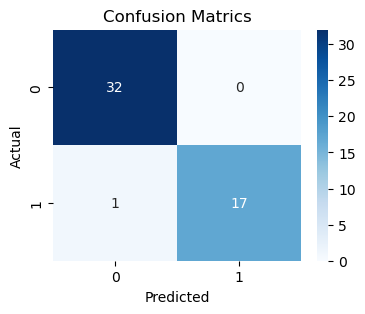

In [71]:
plt.figure(figsize = (4,3))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrics')
plt.show()